# TYES EJ SCREEN 

This notebook is looking at environmental justice data for the TYES area, specifically pulling in indicators from the federal government's EJ SCREEN. Because it uses census-tract level data, we have identified specific California tracts that make up the TYES area at 1, 2 and 3 miles.  

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import networkx as nx
import osmnx as ox
import contextily as ctx
from matplotlib.patches import Patch
from matplotlib.lines import Line2D 

### Geographic Data Pull ###

Here I am going to import EJ Screen Data for all of LA County, then I will specifically look at the areas that make up the census tracts in miles 1, 2, 3 for TYES. First, I will pull in GEOJSON Census Tract geographic data from: https://geohub.lacity.org/datasets/lacounty::census-tracts-2020/about

In [2]:
tracts=gpd.read_file('data/ct2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,2496,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,2497,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,2498,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,2499,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,2500,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [3]:
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [4]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222


### Environmental Justice 

 I accessed federal data files from the EPA that include environmental justice indicators, but they needed to be filtered down to the tract level to not crash Jupyter Hub. I am going to read in and start to clean the EJ dataset. 

In [5]:
ejca_full= pd.read_csv(
    'data/ejca.csv',
    dtype=
    { 
        'ID':str
    }
)

In [6]:
ejca =ejca_full[ejca_full['CNTY_NAME'] == "Los Angeles"]

In [7]:
ejca

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OBJECTID,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,...,T_PTSDF_D2,T_UST_D2,T_PWDIS_D2,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,0,0,0,5584,5585,06037101110,California,CA,Los Angeles,9,...,17 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,5565.411337,1.676519e+06
1,1,1,1,5585,5586,06037101122,California,CA,Los Angeles,9,...,9 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,11695.304395,3.881000e+06
2,2,2,2,5586,5587,06037101220,California,CA,Los Angeles,9,...,31 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,4688.607305,1.025452e+06
3,3,3,3,5587,5588,06037101221,California,CA,Los Angeles,9,...,23 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3378.823980,5.197057e+05
4,4,4,4,5588,5589,06037101222,California,CA,Los Angeles,9,...,30 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3685.233326,4.350619e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,2493,2493,2493,8077,8078,06037980038,California,CA,Los Angeles,9,...,0 %ile,0 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,15825.162592,6.588690e+06
2494,2494,2494,2494,8078,8079,06037980039,California,CA,Los Angeles,9,...,0 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,7196.703199,1.990662e+06
2495,2495,2495,2495,8079,8080,06037990100,California,CA,Los Angeles,9,...,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92125.273156,2.520136e+08
2496,2496,2496,2496,8080,8081,06037990200,California,CA,Los Angeles,9,...,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114705.298226,3.020180e+08


In [8]:
ejca.to_csv('data/ejca.csv')

In [9]:
ejca['FIPS']=ejca['ID']
ejca['FIPS']

0       06037101110
1       06037101122
2       06037101220
3       06037101221
4       06037101222
           ...     
2493    06037980038
2494    06037980039
2495    06037990100
2496    06037990200
2497    06037990300
Name: FIPS, Length: 2498, dtype: object

In [10]:
tyes_ej= tracts.merge(ejca,on='FIPS')

In [11]:
tyes_ej

,CT20,geometry,FIPS,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OBJECTID,ID,STATE_NAME,...,T_PTSDF_D2,T_UST_D2,T_PWDIS_D2,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,0,0,0,5584,5585,06037101110,California,...,17 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,5565.411337,1.676519e+06
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,1,1,1,5585,5586,06037101122,California,...,9 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,11695.304395,3.881000e+06
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,2,2,2,5586,5587,06037101220,California,...,31 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,4688.607305,1.025452e+06
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3,3,3,5587,5588,06037101221,California,...,23 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3378.823980,5.197057e+05
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222,4,4,4,5588,5589,06037101222,California,...,30 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3685.233326,4.350619e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,980031,"MULTIPOLYGON (((-118.26315 33.76749, -118.2633...",06037980031,2487,2487,2487,8071,8072,06037980031,California,...,58 %ile,69 %ile,22 %ile,NaN,NaN,NaN,NaN,NaN,30526.044346,3.762262e+07
2492,980033,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,2488,2488,2488,8072,8073,06037980033,California,...,97 %ile,98 %ile,99 %ile,NaN,NaN,NaN,NaN,NaN,28538.578752,4.152819e+07
2493,599000,"POLYGON ((-118.33083 33.35590, -118.33083 33.3...",06037599000,2059,2059,2059,7643,7644,06037599000,California,...,0 %ile,73 %ile,NaN,NaN,NaN,NaN,NaN,NaN,11221.817411,5.523926e+06
2494,599100,"MULTIPOLYGON (((-118.60592 33.47890, -118.6059...",06037599100,2060,2060,2060,7644,7645,06037599100,California,...,0 %ile,66 %ile,NaN,NaN,NaN,NaN,NaN,NaN,283589.506900,2.054634e+09


In [12]:
tyes_ej['FIPS'].info

<bound method Series.info of 0       06037101110
1       06037101122
2       06037101220
3       06037101221
4       06037101222
           ...     
2491    06037980031
2492    06037980033
2493    06037599000
2494    06037599100
2495    06037990300
Name: FIPS, Length: 2496, dtype: object>

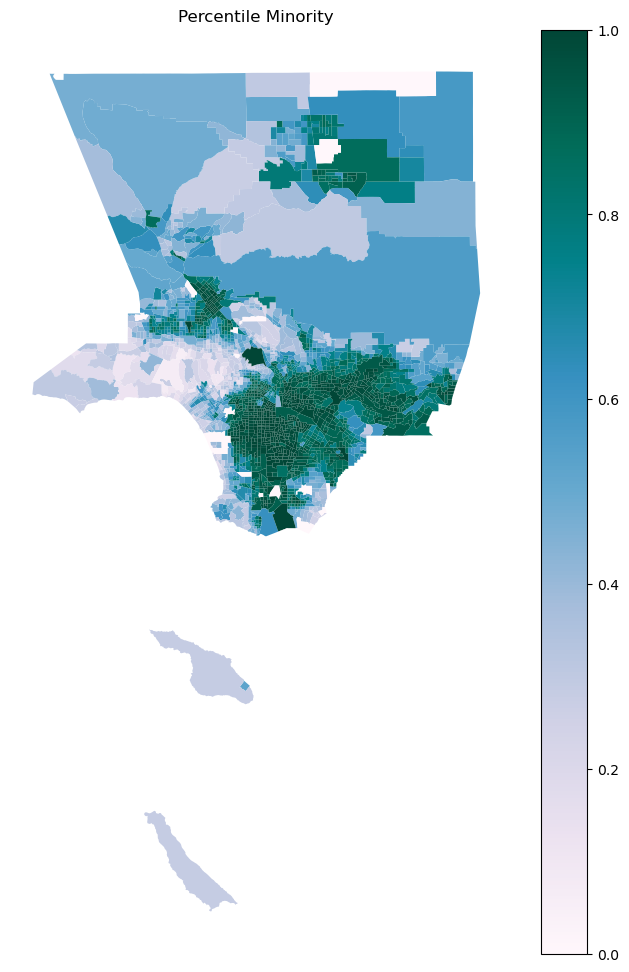

In [13]:
fig, ax = plt.subplots(figsize = (10,12)) 
tyes_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},cmap = 'PuBuGn',ax=ax)

ax.axis('off')
#minx,miny,maxx,maxy = tyes_ej.total_bounds
# set the x and y limits manually
#ax.set_xlim(minx+0.2,maxx-0.2) # zooming in just a bit
plt.title('Percentile Minority')
plt.savefig("Percentile Minority.png", transparent=True)

/opt/conda/lib/python3.10/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 26 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


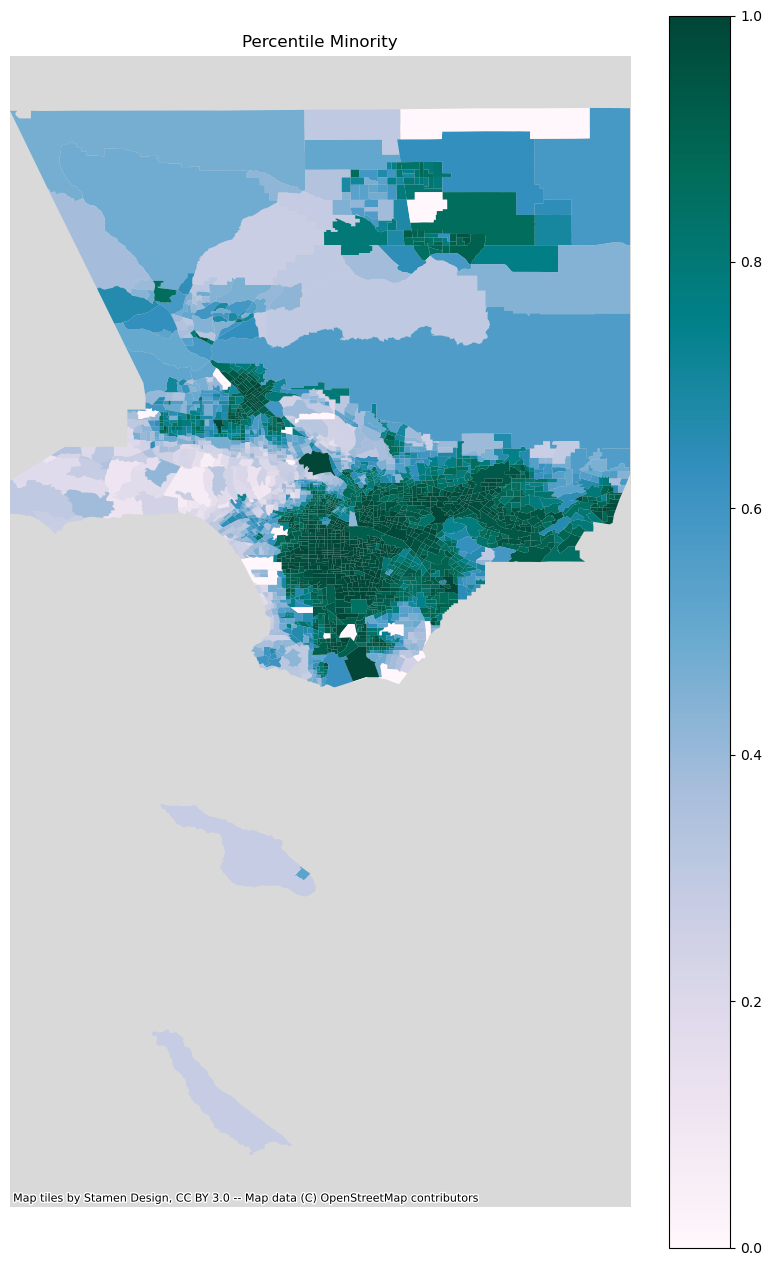

In [14]:
fig, ax = plt.subplots(figsize = (10,16)) 
tyes_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},cmap = 'PuBuGn',ax=ax)

ax.axis('off')
minx,miny,maxx,maxy = tyes_ej.total_bounds
# set the x and y limits manually
ax.set_xlim(minx+.05,maxx-0.05) # zooming in just a bit

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)

plt.title('Percentile Minority')
plt.savefig("Percentile Minority.png", transparent=True)

In [15]:
tyes_ej

,CT20,geometry,FIPS,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OBJECTID,ID,STATE_NAME,...,T_PTSDF_D2,T_UST_D2,T_PWDIS_D2,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,0,0,0,5584,5585,06037101110,California,...,17 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,5565.411337,1.676519e+06
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,1,1,1,5585,5586,06037101122,California,...,9 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,11695.304395,3.881000e+06
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,2,2,2,5586,5587,06037101220,California,...,31 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,4688.607305,1.025452e+06
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3,3,3,5587,5588,06037101221,California,...,23 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3378.823980,5.197057e+05
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222,4,4,4,5588,5589,06037101222,California,...,30 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3685.233326,4.350619e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,980031,"MULTIPOLYGON (((-118.26315 33.76749, -118.2633...",06037980031,2487,2487,2487,8071,8072,06037980031,California,...,58 %ile,69 %ile,22 %ile,NaN,NaN,NaN,NaN,NaN,30526.044346,3.762262e+07
2492,980033,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,2488,2488,2488,8072,8073,06037980033,California,...,97 %ile,98 %ile,99 %ile,NaN,NaN,NaN,NaN,NaN,28538.578752,4.152819e+07
2493,599000,"POLYGON ((-118.33083 33.35590, -118.33083 33.3...",06037599000,2059,2059,2059,7643,7644,06037599000,California,...,0 %ile,73 %ile,NaN,NaN,NaN,NaN,NaN,NaN,11221.817411,5.523926e+06
2494,599100,"MULTIPOLYGON (((-118.60592 33.47890, -118.6059...",06037599100,2060,2060,2060,7644,7645,06037599100,California,...,0 %ile,66 %ile,NaN,NaN,NaN,NaN,NaN,NaN,283589.506900,2.054634e+09


In [16]:
tyes_ej.drop(tyes_ej[tyes_ej['ID'] == "06037599100"].index, inplace = True)

In [17]:
tyes_ej

,CT20,geometry,FIPS,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OBJECTID,ID,STATE_NAME,...,T_PTSDF_D2,T_UST_D2,T_PWDIS_D2,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,0,0,0,5584,5585,06037101110,California,...,17 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,5565.411337,1.676519e+06
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,1,1,1,5585,5586,06037101122,California,...,9 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,11695.304395,3.881000e+06
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,2,2,2,5586,5587,06037101220,California,...,31 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,4688.607305,1.025452e+06
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3,3,3,5587,5588,06037101221,California,...,23 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3378.823980,5.197057e+05
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222,4,4,4,5588,5589,06037101222,California,...,30 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3685.233326,4.350619e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,577504,"MULTIPOLYGON (((-118.13009 33.75447, -118.1306...",06037577504,2049,2049,2049,7633,7634,06037577504,California,...,35 %ile,0 %ile,54 %ile,NaN,NaN,NaN,NaN,NaN,13517.286947,5.874074e+06
2491,980031,"MULTIPOLYGON (((-118.26315 33.76749, -118.2633...",06037980031,2487,2487,2487,8071,8072,06037980031,California,...,58 %ile,69 %ile,22 %ile,NaN,NaN,NaN,NaN,NaN,30526.044346,3.762262e+07
2492,980033,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,2488,2488,2488,8072,8073,06037980033,California,...,97 %ile,98 %ile,99 %ile,NaN,NaN,NaN,NaN,NaN,28538.578752,4.152819e+07
2493,599000,"POLYGON ((-118.33083 33.35590, -118.33083 33.3...",06037599000,2059,2059,2059,7643,7644,06037599000,California,...,0 %ile,73 %ile,NaN,NaN,NaN,NaN,NaN,NaN,11221.817411,5.523926e+06


In [18]:
tyes_ej.drop(tyes_ej[tyes_ej['ID'] == "06037599000"].index, inplace = True)

In [19]:
tyes_ej

,CT20,geometry,FIPS,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OBJECTID,ID,STATE_NAME,...,T_PTSDF_D2,T_UST_D2,T_PWDIS_D2,EXCEED_COUNT_80,AREALAND,AREAWATER,NPL_CNT,TSDF_CNT,Shape_Length,Shape_Area
0,101110,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,0,0,0,5584,5585,06037101110,California,...,17 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,5565.411337,1.676519e+06
1,101122,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,1,1,1,5585,5586,06037101122,California,...,9 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,11695.304395,3.881000e+06
2,101220,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,2,2,2,5586,5587,06037101220,California,...,31 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,4688.607305,1.025452e+06
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3,3,3,5587,5588,06037101221,California,...,23 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3378.823980,5.197057e+05
4,101222,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222,4,4,4,5588,5589,06037101222,California,...,30 %ile,0 %ile,NaN,NaN,NaN,NaN,NaN,NaN,3685.233326,4.350619e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,576602,"POLYGON ((-118.17136 33.76836, -118.17315 33.7...",06037576602,2036,2036,2036,7620,7621,06037576602,California,...,66 %ile,0 %ile,68 %ile,NaN,NaN,NaN,NaN,NaN,16284.008900,7.241740e+06
2490,577504,"MULTIPOLYGON (((-118.13009 33.75447, -118.1306...",06037577504,2049,2049,2049,7633,7634,06037577504,California,...,35 %ile,0 %ile,54 %ile,NaN,NaN,NaN,NaN,NaN,13517.286947,5.874074e+06
2491,980031,"MULTIPOLYGON (((-118.26315 33.76749, -118.2633...",06037980031,2487,2487,2487,8071,8072,06037980031,California,...,58 %ile,69 %ile,22 %ile,NaN,NaN,NaN,NaN,NaN,30526.044346,3.762262e+07
2492,980033,"POLYGON ((-118.20551 33.78265, -118.20631 33.7...",06037980033,2488,2488,2488,8072,8073,06037980033,California,...,97 %ile,98 %ile,99 %ile,NaN,NaN,NaN,NaN,NaN,28538.578752,4.152819e+07


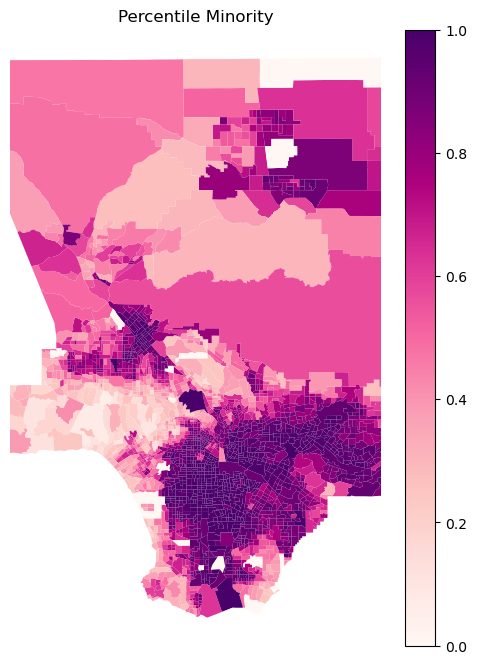

In [20]:
fig, ax = plt.subplots(figsize = (6,8)) 
tyes_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},cmap = 'RdPu',ax=ax)

ax.axis('off')
minx,miny,maxx,maxy = tyes_ej.total_bounds
# set the x and y limits manually
ax.set_xlim(minx+.2,maxx-0.2) # zooming in just a bit

#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)

plt.title('Percentile Minority')
plt.savefig("Percentile Minority pink.png", transparent=True)

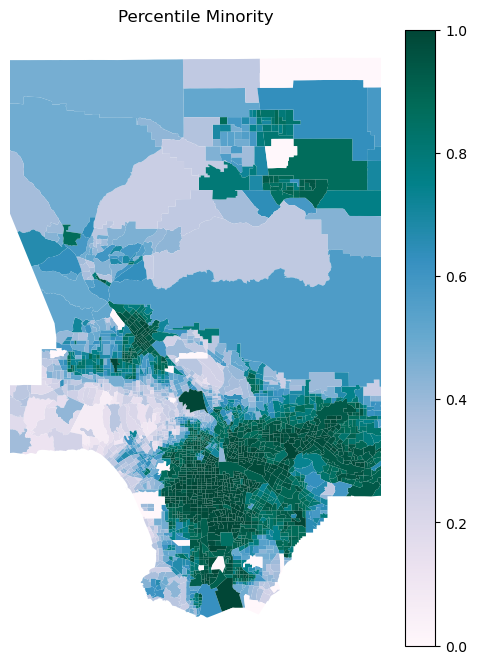

In [21]:
fig, ax = plt.subplots(figsize = (6,8)) 
tyes_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},cmap = 'PuBuGn',ax=ax)

ax.axis('off')
minx,miny,maxx,maxy = tyes_ej.total_bounds
# set the x and y limits manually
ax.set_xlim(minx+.2,maxx-0.2) # zooming in just a bit

#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)

plt.title('Percentile Minority')
plt.savefig("Percentile Minority green.png", transparent=True)

trying out different color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [22]:
tyes1_FIPS = ["06037302506", "06037302505", "06037185204", "06037185203", "06037302401","06037185100", "06037185202", "06037185310", "06037187300", "06037186301", "06037187200", "06037186401", "06037187102", "06037195100", "06037188201", "06037187101","06037186404", "06037186403", "06037186302", "06037185320", "06037197410", "06037197300","06037197200", "06037188300", "06037197420", "06037199000", "06037980010"]

In [23]:
tyes1_FIPS

['06037302506',
 '06037302505',
 '06037185204',
 '06037185203',
 '06037302401',
 '06037185100',
 '06037185202',
 '06037185310',
 '06037187300',
 '06037186301',
 '06037187200',
 '06037186401',
 '06037187102',
 '06037195100',
 '06037188201',
 '06037187101',
 '06037186404',
 '06037186403',
 '06037186302',
 '06037185320',
 '06037197410',
 '06037197300',
 '06037197200',
 '06037188300',
 '06037197420',
 '06037199000',
 '06037980010']

In [24]:
tyes1_tracts = tracts[tracts['FIPS'].isin(tyes1_FIPS)]

tyes1_boundary = tyes1_tracts.dissolve()

In [25]:
tyes1_tracts

,CT20,geometry,FIPS
415,185202,"POLYGON ((-118.20968 34.09539, -118.21014 34.0...",06037185202
416,185203,"POLYGON ((-118.22644 34.09728, -118.22749 34.0...",06037185203
417,185204,"POLYGON ((-118.21778 34.10169, -118.21739 34.1...",06037185204
418,185310,"POLYGON ((-118.21563 34.08853, -118.21609 34.0...",06037185310
419,185320,"POLYGON ((-118.21905 34.08644, -118.21956 34.0...",06037185320
424,186301,"POLYGON ((-118.22971 34.12126, -118.22987 34.1...",06037186301
425,186302,"POLYGON ((-118.22287 34.11661, -118.22303 34.1...",06037186302
426,186401,"POLYGON ((-118.23488 34.11784, -118.23490 34.1...",06037186401
427,186403,"POLYGON ((-118.23690 34.11185, -118.23655 34.1...",06037186403
428,186404,"POLYGON ((-118.23161 34.10479, -118.23124 34.1...",06037186404


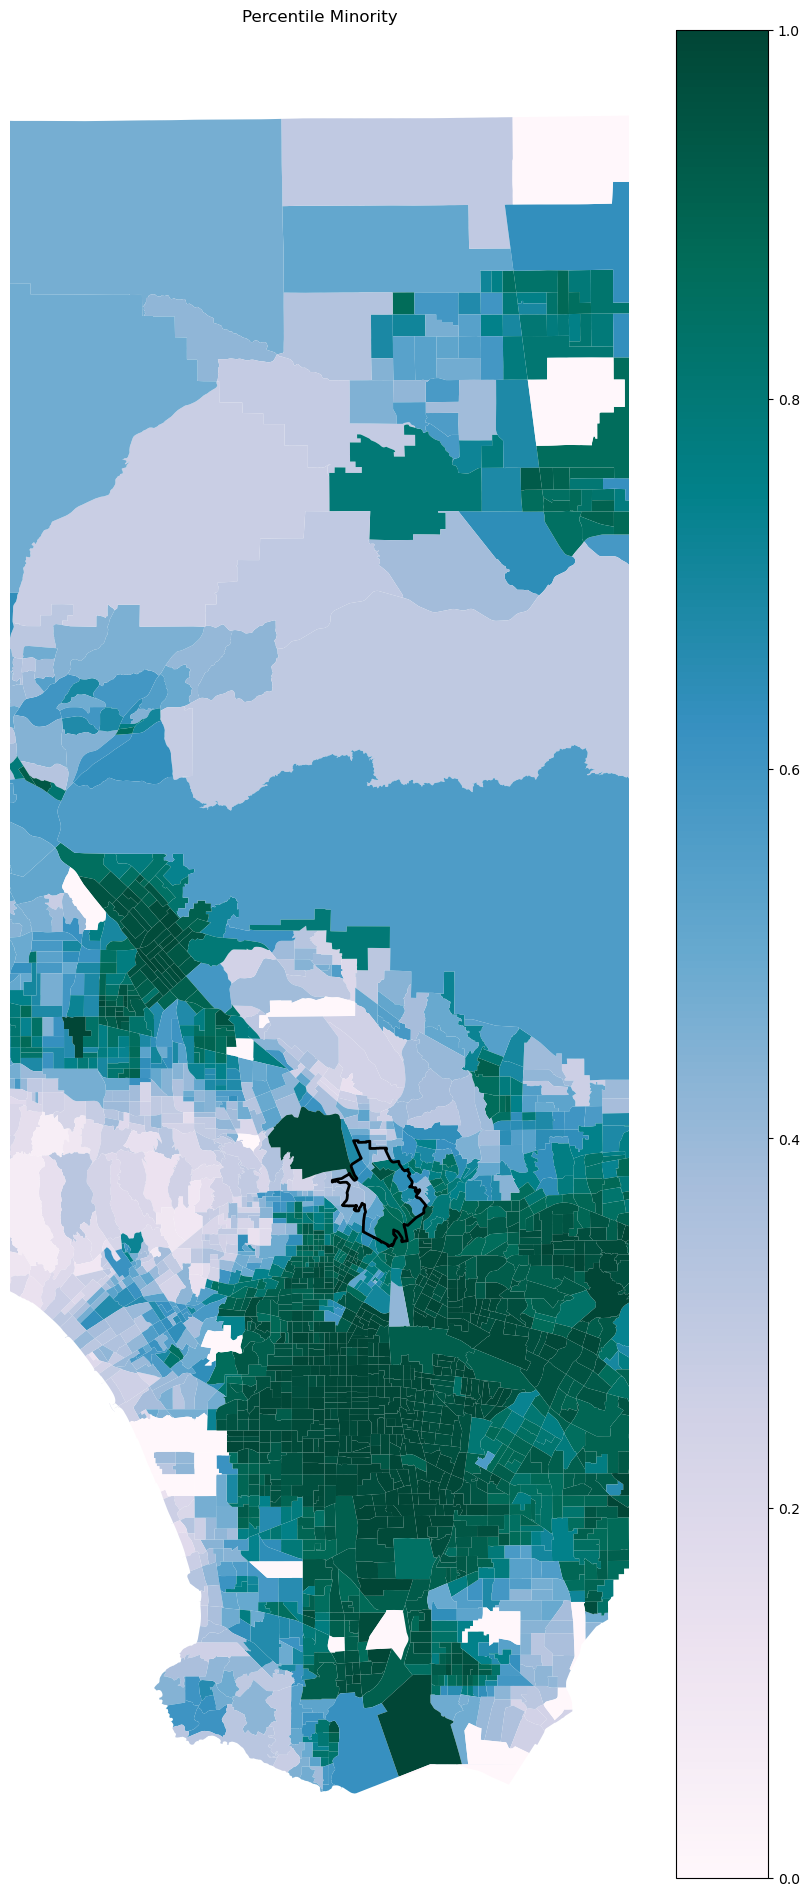

In [26]:
fig, ax = plt.subplots(figsize = (12,24)) 
tyes_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},cmap = 'PuBuGn',ax=ax)

ax.axis('off')
minx,miny,maxx,maxy = tyes_ej.total_bounds
# set the x and y limits manually
ax.set_xlim(minx+.4,maxx-0.4) # zooming in just a bit
tyes1_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 2,ax=ax)

#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)

plt.title('Percentile Minority')
plt.savefig("Percentile Minority green.png", transparent=True)

In [ ]:
tyes2_FIPS = ["06037302506","06037302505","06037185204","06037185203","06037186301","06037302504","06037302503","06037302401","06037207103","06037206010","06037183820","06037185100","06037185202","06037185310","06037186100","06037187300","06037181300","06037187200","06037186401","06037187102","06037199700","06037195202","06037195201","06037980009","06037188202","06037195400","06037195600","06037195100","06037188201","06037187101","06037186404","06037186403","06037186302","06037186203","06037186202","06037185320","06037195500","06037195720","06037195710","06037197410","06037197300","06037197200","06037186201","06037183402","06037183401","06037195300","06037302103","06037302202","06037188300","06037302102","06037302302","06037197700","06037197600","06037197420","06037197500","06037199000","06037199202","06037980010","06037199400","06037199300","06037199201","06037199800","06037188100","06037183510","06037183520","06037183810"]

tyes2_tracts = tracts[tracts['FIPS'].isin(tyes2_FIPS)]

tyes2_boundary = tyes2_tracts.dissolve()


In [30]:
tyes2_FIPS 

['06037302506',
 '06037302505',
 '06037185204',
 '06037185203',
 '06037186301',
 '06037302504',
 '06037302503',
 '06037302401',
 '06037207103',
 '06037206010',
 '06037183820',
 '06037185100',
 '06037185202',
 '06037185310',
 '06037186100',
 '06037187300',
 '06037181300',
 '06037187200',
 '06037186401',
 '06037187102',
 '06037199700',
 '06037195202',
 '06037195201',
 '06037980009',
 '06037188202',
 '06037195400',
 '06037195600',
 '06037195100',
 '06037188201',
 '06037187101',
 '06037186404',
 '06037186403',
 '06037186302',
 '06037186203',
 '06037186202',
 '06037185320',
 '06037195500',
 '06037195720',
 '06037195710',
 '06037197410',
 '06037197300',
 '06037197200',
 '06037186201',
 '06037183402',
 '06037183401',
 '06037195300',
 '06037302103',
 '06037302202',
 '06037188300',
 '06037302102',
 '06037302302',
 '06037197700',
 '06037197600',
 '06037197420',
 '06037197500',
 '06037199000',
 '06037199202',
 '06037980010',
 '06037199400',
 '06037199300',
 '06037199201',
 '06037199800',
 '060371

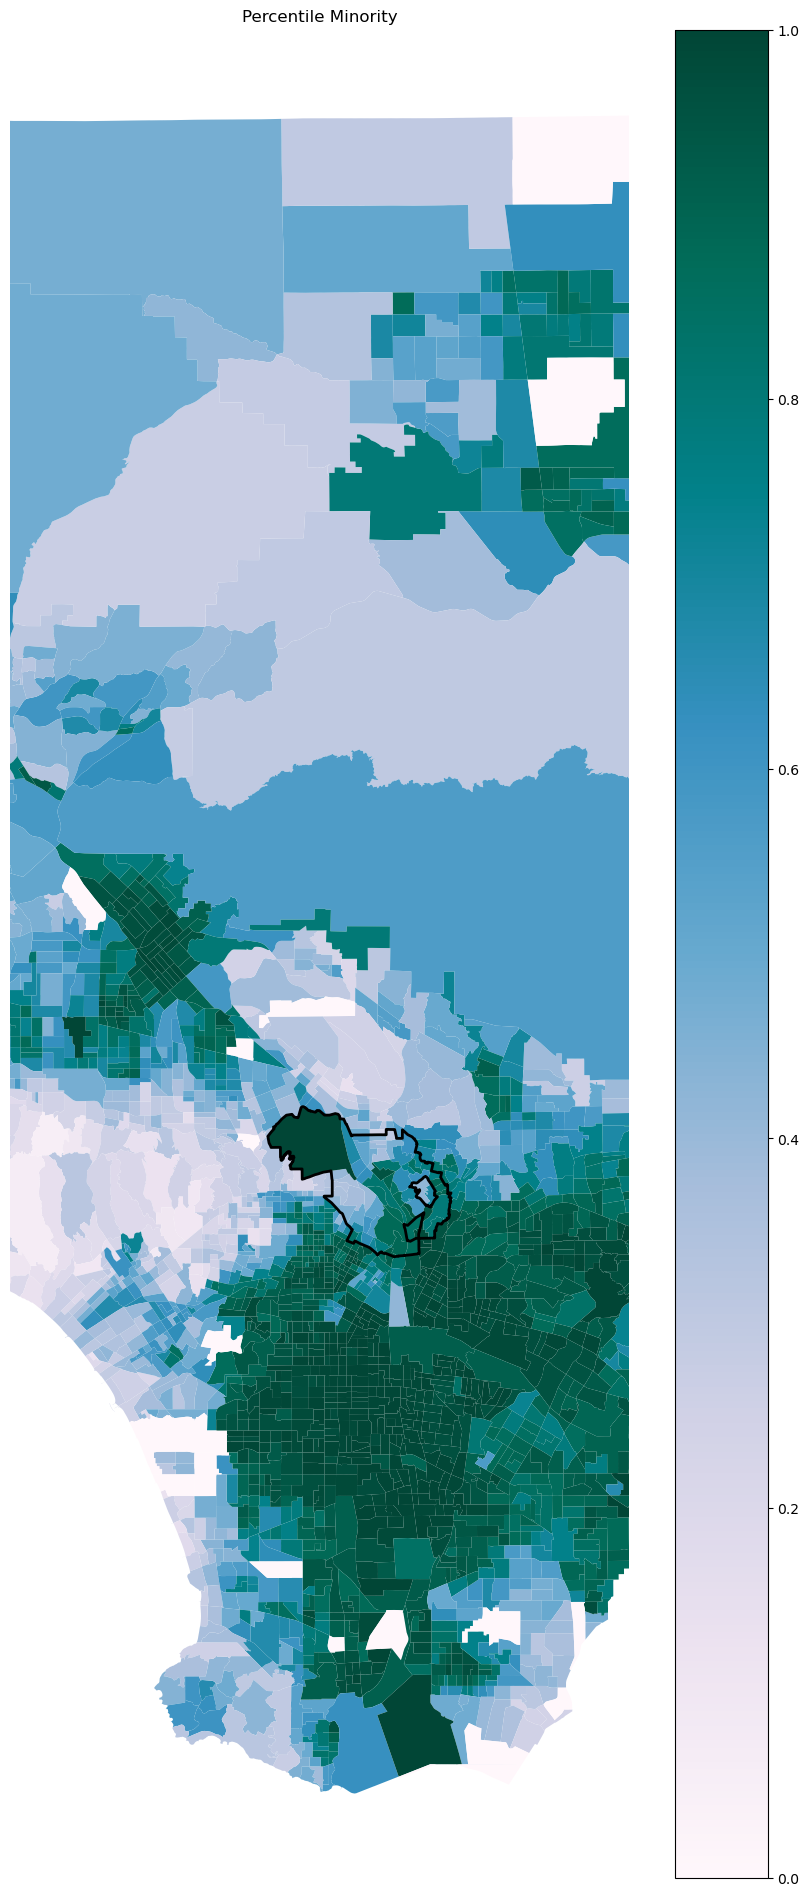

In [29]:
fig, ax = plt.subplots(figsize = (12,24)) 
tyes_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},cmap = 'PuBuGn',ax=ax)

ax.axis('off')
minx,miny,maxx,maxy = tyes_ej.total_bounds
# set the x and y limits manually
ax.set_xlim(minx+.4,maxx-0.4) # zooming in just a bit
tyes2_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 2,ax=ax)

#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)

plt.title('Percentile Minority')
plt.savefig("Percentile Minority green.png", transparent=True)

In [31]:
tyes3_FIPS =["06037208301","06037207502","06037207301","06037207102","06037207101","06037207501","06037206031","06037206020","06037207400","06037208903","06037209102","06037208904","06037209200","06037203600","06037203300","06037203100","06037203500","06037209104","06037209103","06037208801","06037206032","06037206200","06037302506","06037302505","06037211121","06037189201","06037185204","06037185203","06037208501","06037186301","06037302504","06037302503","06037302401","06037302004","06037302003","06037301802","06037301801","06037207103","06037206010","06037208000","06037208610","06037208620","06037183820","06037185100","06037185202","06037185310","06037186100","06037183220","06037187300","06037181300","06037187200","06037186401","06037187102","06037189300","06037199700","06037191201","06037191204","06037195903","06037195902","06037195901","06037195804","06037195803","06037195202","06037195201","06037181000","06037191420","06037191500","06037191410","06037980009","06037191302","06037191301","06037189202","06037189102","06037189101","06037188202","06037195400","06037192700","06037195600","06037195100","06037188201","06037187101","06037186404","06037186403","06037186302","06037186203","06037186202","06037185320","06037195500","06037195720","06037195710","06037197410","06037195802","06037197300","06037197200","06037186201","06037183702","06037183701","06037183402","06037183401","06037183222","06037183221","06037195300","06037201401","06037301702","06037301900","06037301000","06037302002","06037300902","06037302103","06037302301","06037302201","06037302202","06037188300","06037302104","06037302102","06037302302","06037199110","06037197700","06037197600","06037197420","06037197500","06037199000","06037199120","06037199202","06037980010","06037191203","06037199400","06037199300","06037199900","06037199201","06037199800","06037201301","06037201302","06037181600","06037201402","06037208502","06037208402","06037208401","06037208302","06037188100","06037181500","06037181400","06037183620","06037183300","06037183510","06037183610","06037183520","06037183810","06037183101","06037201200","06037201110"]

In [32]:
tyes3_tracts = tracts[tracts['FIPS'].isin(tyes3_FIPS)]

tyes3_boundary = tyes3_tracts.dissolve()

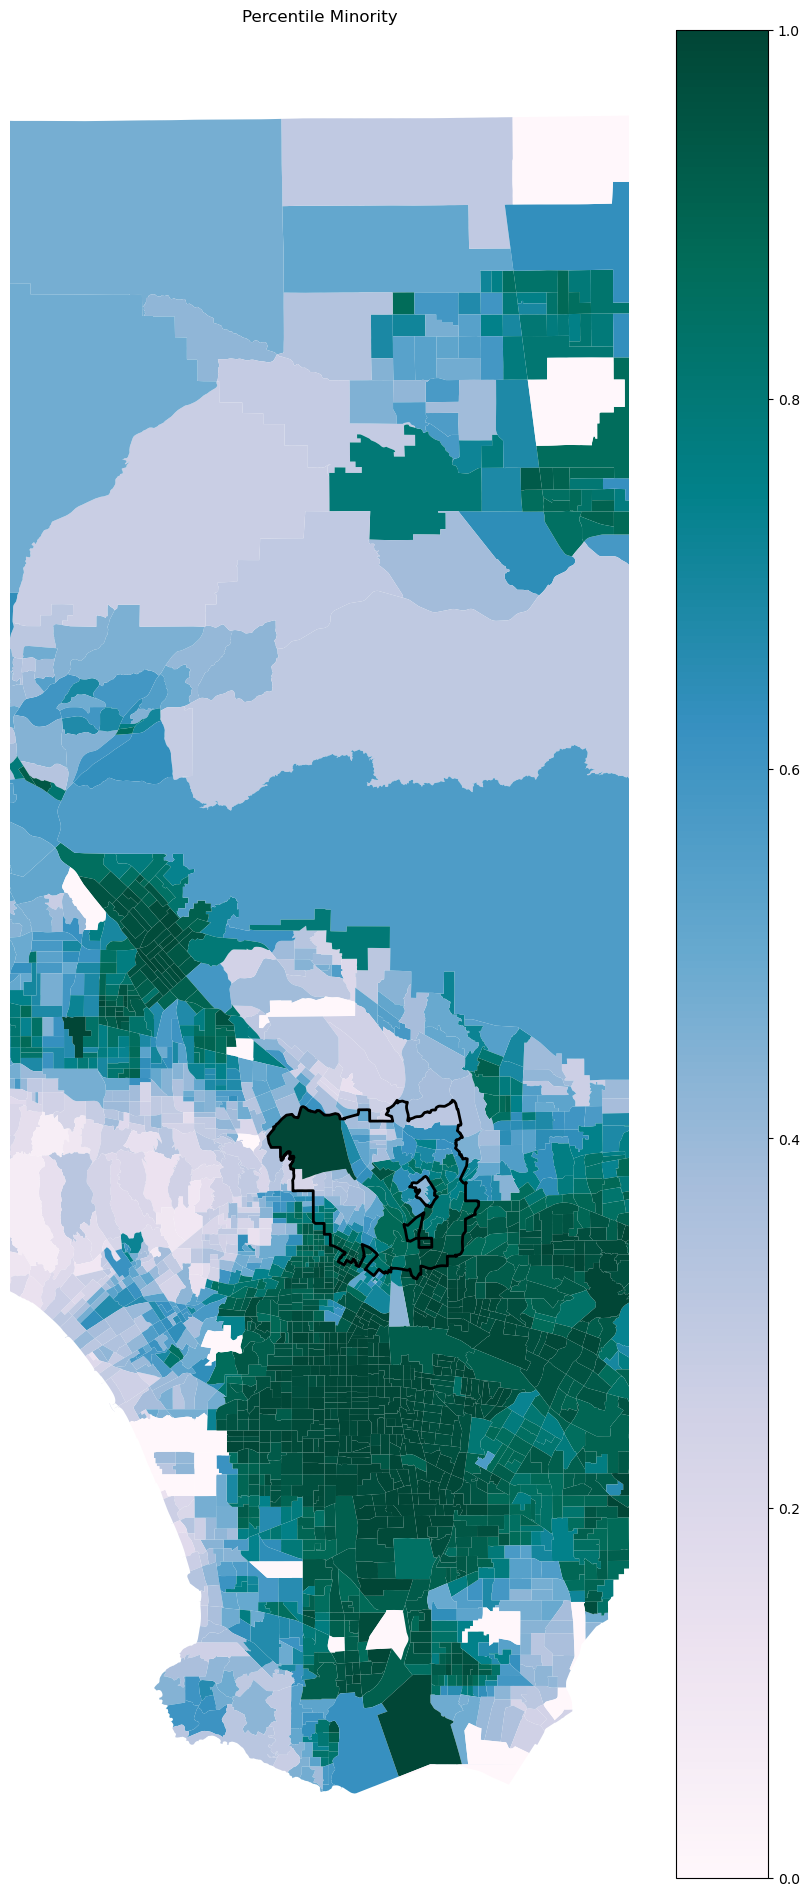

In [33]:
fig, ax = plt.subplots(figsize = (12,24)) 
tyes_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},cmap = 'PuBuGn',ax=ax)

ax.axis('off')
minx,miny,maxx,maxy = tyes_ej.total_bounds
# set the x and y limits manually
ax.set_xlim(minx+.4,maxx-0.4) # zooming in just a bit
tyes3_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 2,ax=ax)

#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)

plt.title('Percentile Minority')
plt.savefig("Percentile Minority green.png", transparent=True)

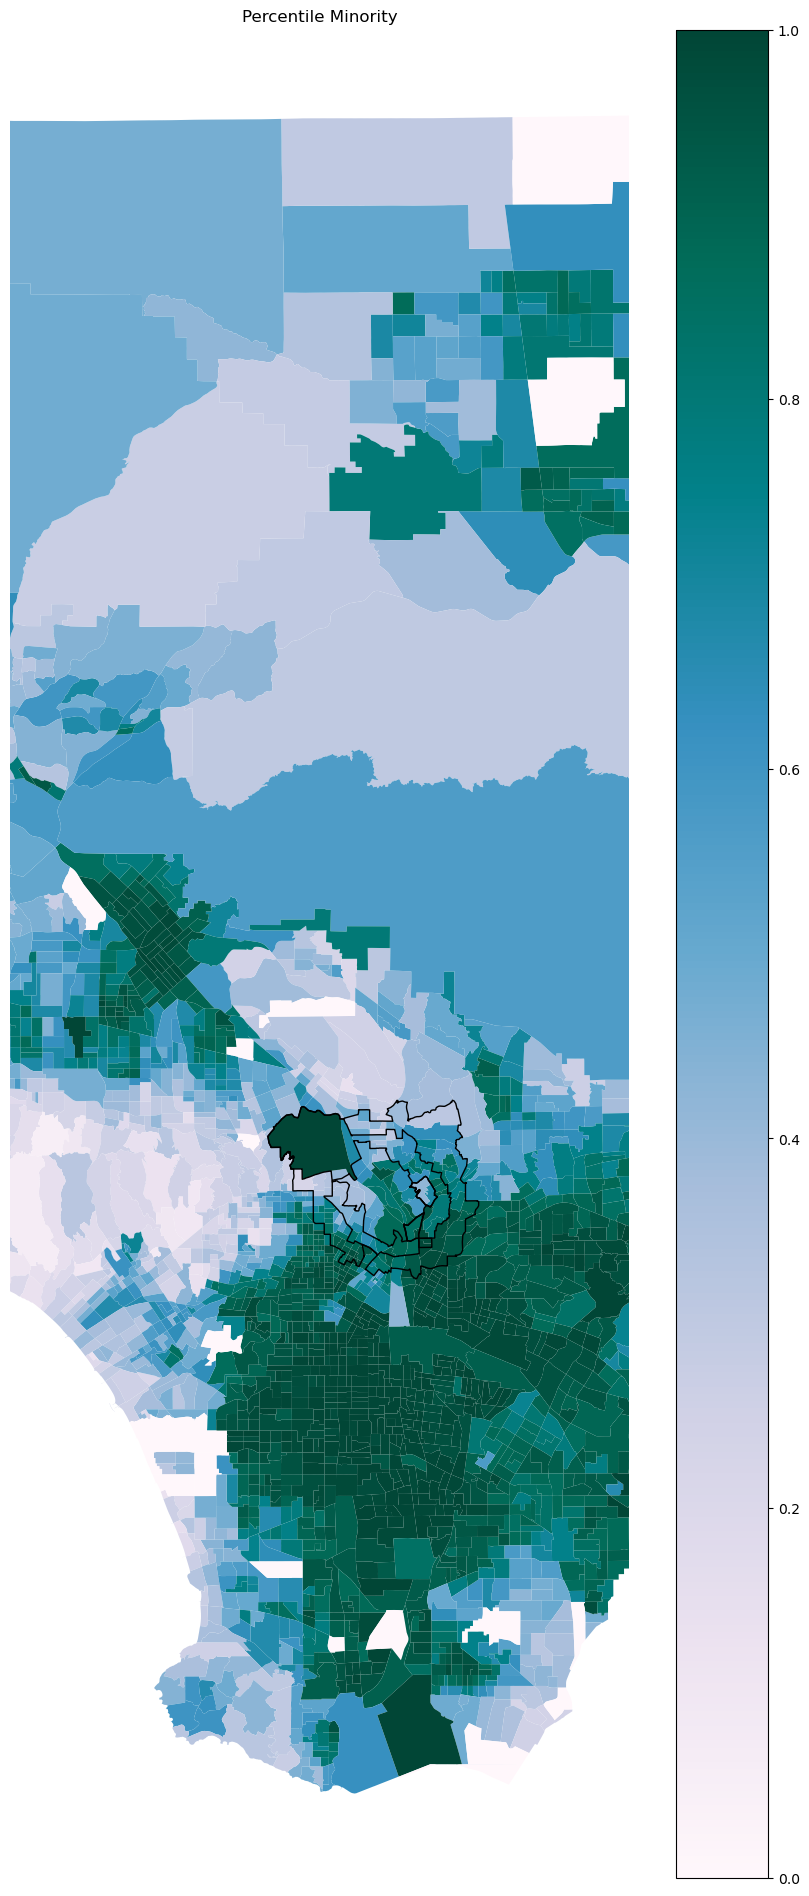

In [35]:
fig, ax = plt.subplots(figsize = (12,24)) 
tyes_ej.plot(column = 'MINORPCT',legend=True,
  legend_kwds={'orientation': "vertical"},classification_kwds={'bins':[0.25, 0.5,0.75,1]},cmap = 'PuBuGn',ax=ax)

ax.axis('off')
minx,miny,maxx,maxy = tyes_ej.total_bounds
# set the x and y limits manually
ax.set_xlim(minx+.4,maxx-0.4) # zooming in just a bit
tyes1_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 1,ax=ax)
tyes2_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 1,ax=ax)
tyes3_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 1,ax=ax)

#ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, crs=3857)

plt.title('Percentile Minority')
plt.savefig("Percentile Minority green.png", transparent=True)